In [1]:
import os
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import time


In [2]:
train = pd.read_csv('train.csv')
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [3]:
test = pd.read_csv('test.csv')

del test["id"]
test.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,0.216756,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,0.477219,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,0.169717,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,0.393592,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,0.364702,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238


In [4]:
from sklearn.model_selection import cross_val_score, train_test_split
train_val, valid = train_test_split(train, test_size=0.3, random_state=0)

In [5]:
X = train_val.iloc[:,4:]
y1 = train_val.loc[:, train_val.columns == 'layer_1']
y2 = train_val.loc[:, train_val.columns == 'layer_2']
y3 = train_val.loc[:, train_val.columns == 'layer_3']
y4 = train_val.loc[:, train_val.columns == 'layer_4']

In [6]:
X_val = valid.iloc[:,4:]
y1_val = valid.loc[:, valid.columns == 'layer_1']
y2_val = valid.loc[:, valid.columns == 'layer_2']
y3_val = valid.loc[:, valid.columns == 'layer_3']
y4_val = valid.loc[:, valid.columns == 'layer_4']

In [7]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso(alpha=1e-4, normalize=False)
lasso.fit(X, y1)
pred = lasso.predict(X_val)
pred

array([151.57355489, 155.66595133, 154.94588823, ..., 162.23859621,
       151.91541609, 164.31708653])

In [ ]:
cross_val_score(lasso, X, y1, cv=3, scoring="mean_absolute_error")

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1_val*10, pred*10)

751.3024501025475

In [40]:
mean_absolute_error(y1_val*10, pred*10)

75.12579488331575

In [12]:
# Best Model
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(X_train, y_train)

NameError: name 'X_train' is not defined

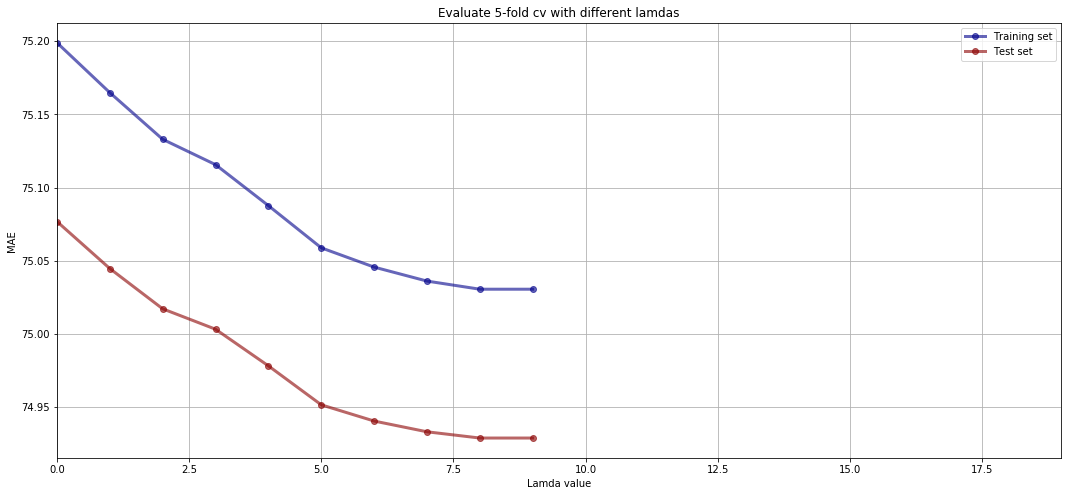

In [17]:
l_min = 0.1
l_max = 1.0
l_num = 10
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = train.shape[1]
coeff_a = np.zeros((l_num, pred_num))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X, y1)
    preds = reg.predict(X)
    preds_val = reg.predict(X_val)
    
    train_r_squared[ind] = mean_absolute_error(y1, preds)    
    test_r_squared[ind] = mean_absolute_error(y1_val, preds_val)
    
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'MAE')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [18]:
# Best model
df_lam = pd.DataFrame(test_r_squared, columns=['MAE'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['MAE'].idxmin()]

MAE       74.928803
lambda     0.900000
Name: 8, dtype: float64

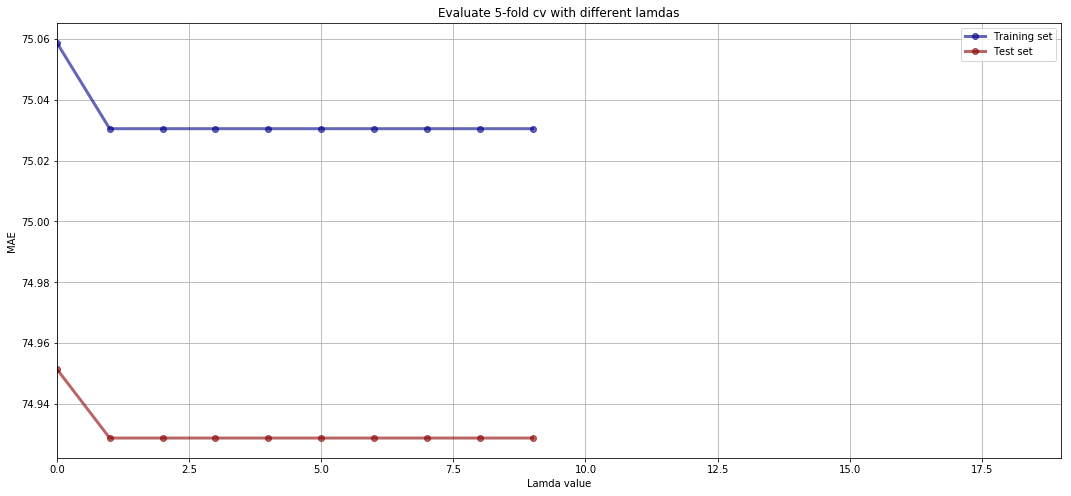

In [21]:
l_min = 0.6
l_max = 10.0
l_num = 10
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = train.shape[1]
coeff_a = np.zeros((l_num, pred_num))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X, y1)
    preds = reg.predict(X)
    preds_val = reg.predict(X_val)
    
    train_r_squared[ind] = mean_absolute_error(y1, preds)    
    test_r_squared[ind] = mean_absolute_error(y1_val, preds_val)
    
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'MAE')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [22]:
# Best model
df_lam = pd.DataFrame(test_r_squared, columns=['MAE'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['MAE'].idxmin()]

MAE       74.928803
lambda     1.644444
Name: 1, dtype: float64

In [23]:
lambdas

array([ 0.6       ,  1.64444444,  2.68888889,  3.73333333,  4.77777778,
        5.82222222,  6.86666667,  7.91111111,  8.95555556, 10.        ])

In [39]:
# Best Model
reg_best = Lasso(alpha = 1.64444444)
reg_best.fit(X, y4)

Lasso(alpha=1.64444444, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
reg_best.coef_

array([ 0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [40]:
pred4 = reg_best.predict(test)
pred4

array([155.03447972, 155.03447972, 155.03447972, ..., 155.03447972,
       155.03447972, 155.03447972])

In [45]:
pred1 = pd.DataFrame(pred1)
pred2 = pd.DataFrame(pred2)
pred3 = pd.DataFrame(pred3)
pred4 = pd.DataFrame(pred4)


In [46]:
pred = pd.concat([pred1,pred2,pred3,pred4],axis=1)
pred

,0,0,0,0
0,155.03642,154.96649,155.138677,155.03448
1,155.03642,154.96649,155.138677,155.03448
2,155.03642,154.96649,155.138677,155.03448
3,155.03642,154.96649,155.138677,155.03448
4,155.03642,154.96649,155.138677,155.03448
...,...,...,...,...
9995,155.03642,154.96649,155.138677,155.03448
9996,155.03642,154.96649,155.138677,155.03448
9997,155.03642,154.96649,155.138677,155.03448
9998,155.03642,154.96649,155.138677,155.03448


In [47]:
pred.to_csv('pred_lasso.csv')

### Simple Reg

In [57]:
# Best Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
pred4 = pd.DataFrame(model.predict(test))

In [59]:
pred = pd.concat([pred1,pred2,pred3,pred4],axis=1)
pred

,0,0,0,0
0,157.152400,151.986587,162.952823,128.364747
1,164.829796,152.999897,162.049059,162.967182
2,152.071708,154.750099,150.563440,136.777615
3,158.626969,157.135820,156.668112,190.405057
4,161.013939,152.215660,156.999472,169.722723
...,...,...,...,...
9995,163.231269,154.952695,168.378498,145.899619
9996,162.392821,153.660804,162.817385,146.584794
9997,143.796807,154.492697,144.997680,154.447070
9998,147.493398,159.441148,153.464334,184.494204


In [60]:
pred.to_csv('pred_simpleReg.csv')